IRIS DATASET

In [1]:
from google.colab import files
uploades=files.upload()

Saving Iris.csv to Iris.csv


In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd

In [4]:
import io
df=pd.read_csv(io.BytesIO(uploades['Iris.csv']))

In [5]:
df=df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [9]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

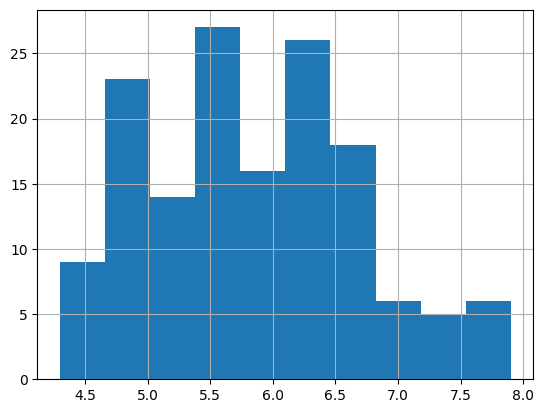

In [10]:
df['SepalLengthCm'].hist()

<Axes: >

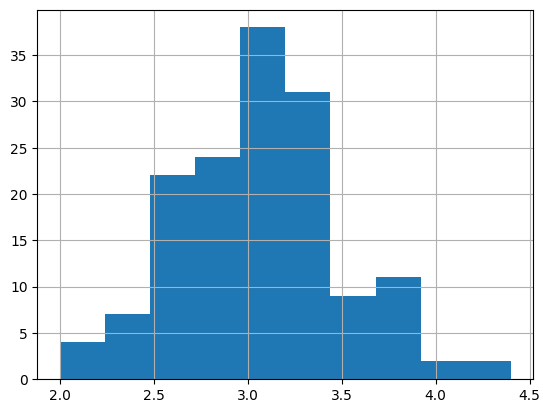

In [11]:
df['SepalWidthCm'].hist()

<Axes: >

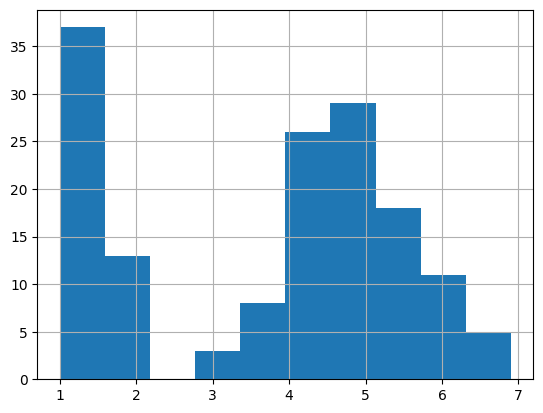

In [12]:
df['PetalLengthCm'].hist()

<Axes: >

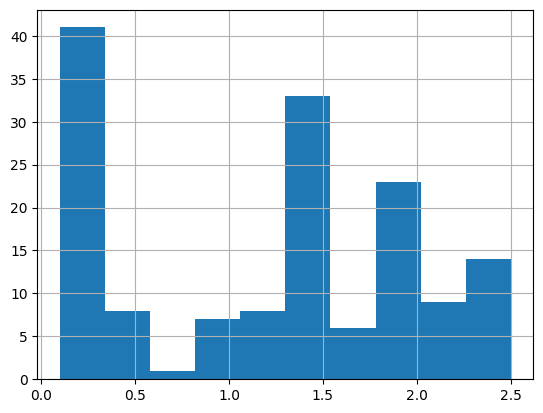

In [13]:
df['PetalWidthCm'].hist()

In [14]:
colors=['red','orange','blue']
species=['Iris-virginica','Iris-versicolor','Iris-setosa']

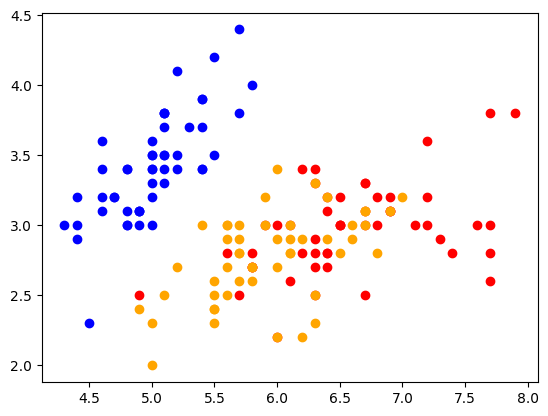

In [15]:
for i in range (3):
  x=df[df['Species']==species[i]]
  plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i],label=species[i])

In [16]:
df.corr()

<ipython-input-16-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [18]:
df['Species']=le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['Species'])
Y=df['Species']
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.20)

In [20]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [21]:
model.fit(x_train, y_train)

LogisticRegression()

In [22]:
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  100.0


In [23]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [24]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [25]:
 print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  100.0


In [26]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [27]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [28]:
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  96.66666666666667


In [29]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=8)

In [30]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [31]:
y_pred=model.predict(x_test)

In [32]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [33]:
print(confusion_matrix(y_test,y_pred))

[[ 6  0  0]
 [ 0 11  0]
 [ 0  0 13]]


In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [35]:
print(accuracy_score(y_test,y_pred))

1.0


In [36]:
from sklearn.svm import SVC

In [37]:
model=SVC()

In [38]:
model.fit(x_train,y_train)
print("accuracy : ",model.score(x_test,y_test)*100)

accuracy :  100.0


In [39]:
print(accuracy_score(y_test,y_pred))

1.0


In [40]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [41]:
print(accuracy_score(y_test,y_pred))

1.0


In [42]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()

In [43]:
model.fit(x_train,y_train)
print("accuracy: ",model.score(x_test,y_test)*100)

accuracy:  90.0


In [44]:
print(accuracy_score(y_test,y_pred))

1.0
